> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

# This is necessary to show lots of columns

source: http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/v0.2/cookbook/Chapter%203%20-%20Which%20borough%20has%20the%20most%20noise%20complaints%20%28or%2C%20more%20selecting%20data%29.ipynb

In [2]:
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)


In [3]:

# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv("tmdb-movies.csv")
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

# First I see there are some columns are not necessary.

I will drop any columns are not necessary to increase focus on the important quastions I want to know that answers


In [5]:
un_necessary_columns=['id', 'imdb_id','overview','popularity','homepage','tagline','keywords','overview']
df=df.drop(un_necessary_columns,axis=1)
df.shape

(10866, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(3), int64(5), object(6)
memory usage: 1.2+ MB


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

# First we want to working with missing data

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(3), int64(5), object(6)
memory usage: 1.2+ MB


I have 10866 records in this dataframe and some columns have a missing data if the data 
type of column is string I will replace by this sentence "No data" 

In [8]:
df[['cast', 'director', 'genres', 'production_companies']]= df[['cast', 'director', 'genres', 'production_companies']].fillna("No data")

# Now I will check

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10866 non-null object
director                10866 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(3), int64(5), object(6)
memory usage: 1.2+ MB


Alright replace the missing data.

# Second deal with duplicated rows.

We are have one duplicate row and we will drop him from data frame.

In [10]:
sum(df.duplicated())

1

drop the duplicate row

In [11]:
df.drop_duplicates(inplace=True)

Lets check again

In [12]:
print (sum(df.duplicated()),"\nGOOD job")

0 
GOOD job


# Third dealing with incorrect data types in columns

We have two columns we want to change the data types of them to date

release_date & release_year

In [13]:
df[['release_date','release_year']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 2 columns):
release_date    10865 non-null object
release_year    10865 non-null int64
dtypes: int64(1), object(1)
memory usage: 254.6+ KB


In [14]:
df['release_year']=pd.to_datetime(df['release_year'],format="%Y")
df['release_year'].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: release_year, dtype: datetime64[ns]

In [15]:
# df['release_date']=pd.to_datetime(df['release_date'])
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [16]:
df[['release_date','release_year']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 2 columns):
release_date    10865 non-null datetime64[ns]
release_year    10865 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 254.6 KB


Now I will check.

In [17]:
df[['release_date','release_year']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 2 columns):
release_date    10865 non-null datetime64[ns]
release_year    10865 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 254.6 KB


# Data Visualaization

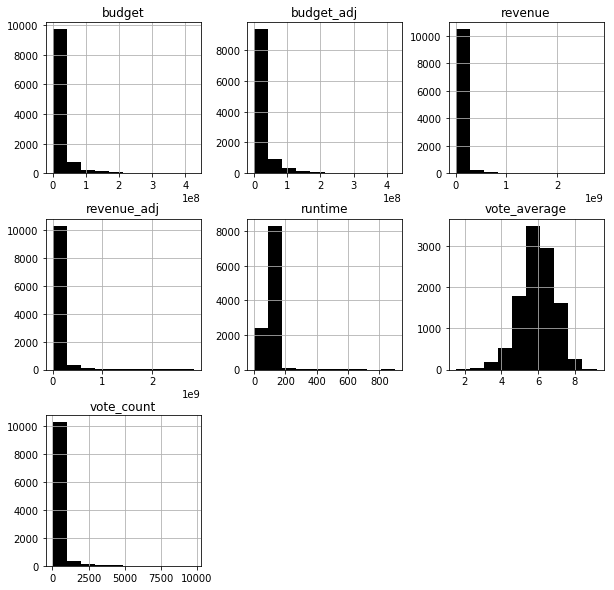

In [18]:
df.hist(figsize=(10,10), color="black");

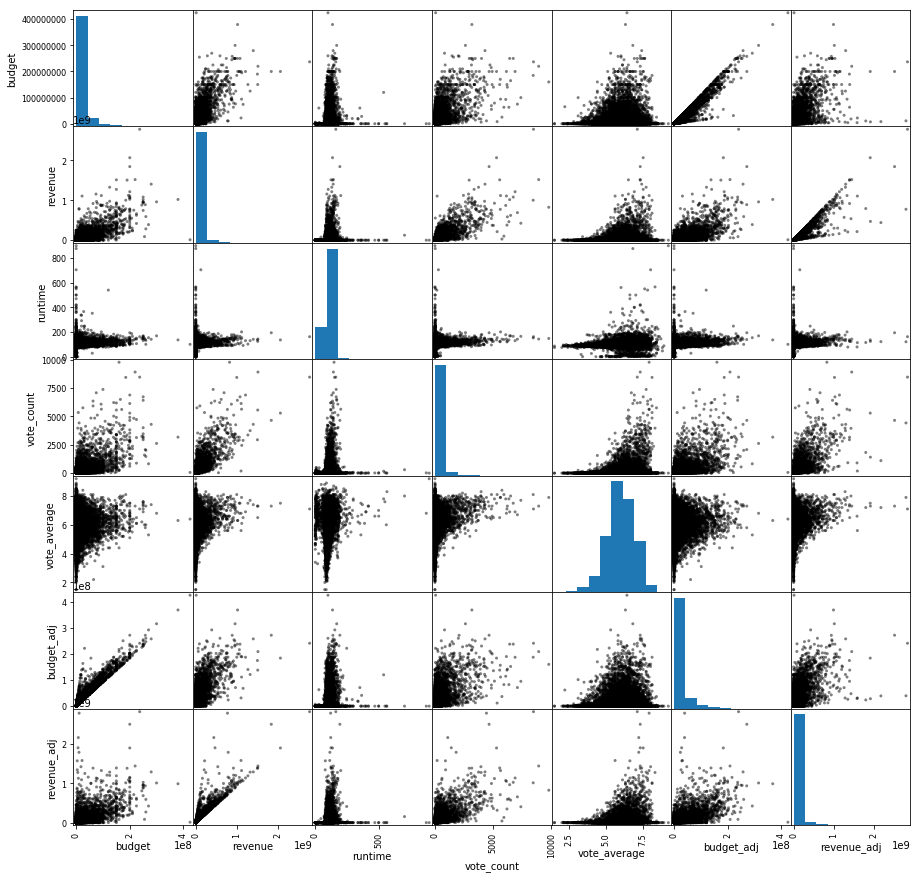

In [19]:
pd.plotting.scatter_matrix(df,figsize=(15,15),color='black');

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


# Q1 : What is the relationship between budget and revenue for all movies?

### Answer: the relationship between budget and revenue for all movies is strong and positive relationship because If the budgets of the movies are high we will be find the increase in revenue. And in the scatter plot below we notice that is a positive relation between the budgets of movies and revenue.


### The correlation of relationship between budgets of movies and the revenue is : 0.7349279812889292 and it a strong positive linear relationship.

### Ther are some outlier in revenues but we want to keep it in our statistics because is it very correct value and we  want to deal with it because it is correct and very necessary, however we know that some movies earned very huge revenues and spread around the world




source: http://www.dmstat1.com/res/TheCorrelationCoefficientDefined.html

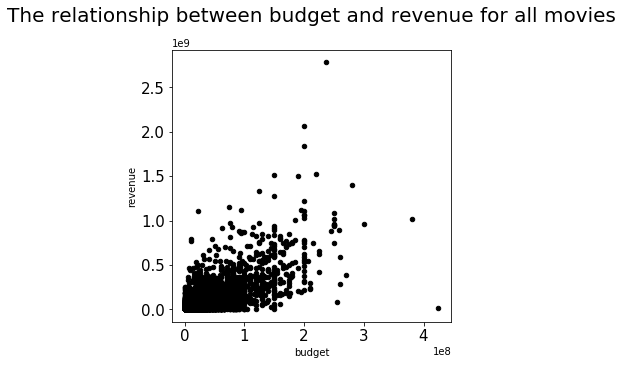

In [20]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.plot('budget','revenue',kind="scatter",figsize=(5,5),fontsize="15",color="black")
plt.title("The relationship between budget and revenue for all movies\n",fontsize="20")
plt.xlabel("budget")
plt.ylabel("revenue");

In [21]:
df['budget'].corr(df['revenue'])

0.7349279812889292

# Q2 : Compare between the budgets and the revenue of the movies?

### Answer: The box plot shows below high returns in the film industry of the world, It is true that there some outlier of data but we know that is a correct value because there are more than movie are made the huge successful on the world level, and make a huge revenue.

### Finally there are very high revenues of movies that are more than the its budgets  and  this show us movies industry is very profitable business

''

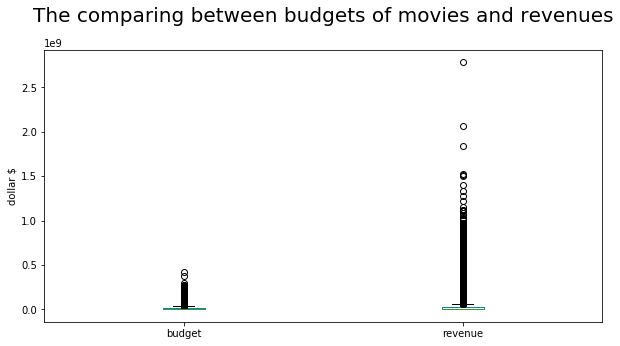

In [22]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df[['budget','revenue']].plot.box(figsize=(10,5))
plt.title("The comparing between budgets of movies and revenues\n", fontsize=20)
plt.ylabel("dollar $")
;



<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

# Summarize:

# Result:

- The movies industry are very profitable.
- Whatever the budget was high the profits would be high.
- Some movies have made incredible revenues
- We can say that the budgets that have been put in place to produce films are almost as much as a quarter of film revenues.


# Limitations: 

- There are some outliers in this dataset like revenue of movies, But I know that data is correct because those movies are made a great success on the world level, and I have kept it because it a necessary data.

- I notice there are some wrong values like the date of 2067-12-27 in the release_date column. If my analysis of these data studies the development of revenues over the past years, I am obliged to deal with this data in this column by replacing it with another value that is near to the correct values. 